In [17]:
import numpy as np
import ConformaQuantile as CQ
import importlib
import kappa as kp
import matplotlib.pyplot as plt
from scipy.stats import norm
importlib.reload(CQ)
importlib.reload(kp)

<module 'kappa' from '/Users/wangyanbo/conformal/kappa.py'>

In [18]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

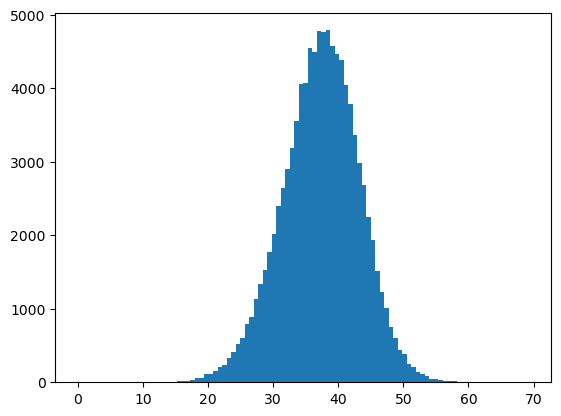

linear loss unadjusted 56.6844455860756 loss_adjusted 54.5933618013593
quantile loss unadjusted 54.897653500223534 loss_adjusted 54.3599338791124
lasso loss unadjusted 56.683815421763626 loss_adjusted 54.59338676719911
ridge loss unadjusted 56.68444547677131 loss_adjusted 54.593361752921
glm loss unadjusted 56.68444558607561 loss_adjusted 54.5933618013593

拥有最小调整损失的模型：quantile

拥有最大调整损失的模型：lasso


In [23]:
quantile = 0.6
n_samples = 100000
n_X1 = 9
n_X2 = 1
n_X3 = 1
np.random.seed(0)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
X1 = abs(np.random.normal(6.4, 10, (n_samples, n_X1)))
X2 = abs(np.random.normal(0.4, 1, (n_samples, n_X2)))
X3 = abs(np.random.normal(0.9, 1, (n_samples, n_X3)))

coefficients = abs(np.random.normal(1, 4, n_X1 + n_X2))
X = np.hstack((X1, X2, X3))
noise = np.random.normal(0, 1, n_samples)

X_true = X[:, :(n_X1 + n_X2)]

X_observed = np.hstack((X1, X3))
Y = np.dot(X_true, coefficients)

threshold = 50
first_element = X_observed[0]
Y5 = np.random.uniform(-Y, Y)

pooled_x4 = []
pooled_y4 = []
distance = []

for x, y in zip(X_observed, Y5):
    distance.append(euclidean_distance(x, first_element))

plt.hist(distance, bins=100)
plt.show()
for x, y in zip(X_observed, Y5):
    if euclidean_distance(x, first_element) <= threshold:
        pooled_x4.append(x)
        pooled_y4.append(y)
pooled_x4 = np.array(pooled_x4)
pooled_y4 = np.array(pooled_y4)

models = ['linear', 'quantile', 'lasso', 'ridge', 'glm']
loss = {}
for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(pooled_x4, pooled_y4, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

In [24]:
loss = {}
for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(X_observed, Y5, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

linear loss unadjusted 57.12856374923794 loss_adjusted 54.75691205137791
quantile loss unadjusted 54.92202262796009 loss_adjusted 54.49520441907626
lasso loss unadjusted 57.127504475647605 loss_adjusted 54.75588420902536
ridge loss unadjusted 57.128563508639694 loss_adjusted 54.75691231962189
glm loss unadjusted 57.12856374923794 loss_adjusted 54.75691205137791

拥有最小调整损失的模型：quantile

拥有最大调整损失的模型：ridge


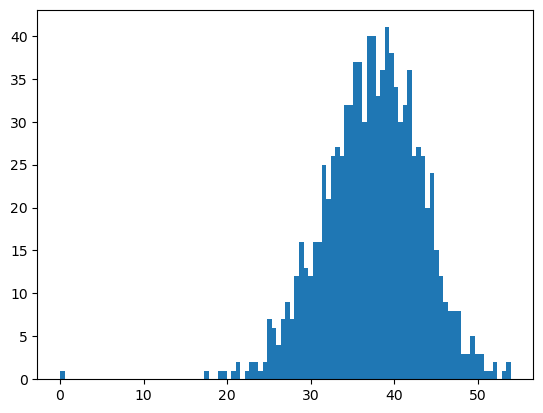

linear loss unadjusted 63.29456810123344 loss_adjusted 64.43548281887006
quantile loss unadjusted 66.34343681585398 loss_adjusted 65.99086780167896
lasso loss unadjusted 63.29460136302372 loss_adjusted 64.42112162855673
ridge loss unadjusted 63.294674916865695 loss_adjusted 64.43385937039717
random_forest loss unadjusted 66.28421057830174 loss_adjusted 63.82981636555792
glm loss unadjusted 63.29456810123342 loss_adjusted 64.43548281887006

拥有最小调整损失的模型：random_forest

拥有最大调整损失的模型：quantile


In [26]:
quantile = 0.6
n_samples = 1000
n_X1 = 9
n_X2 = 1
n_X3 = 1
np.random.seed(0)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
X1 = abs(np.random.normal(6.4, 10, (n_samples, n_X1)))
X2 = abs(np.random.normal(0.4, 1, (n_samples, n_X2)))
X3 = abs(np.random.normal(0.9, 1, (n_samples, n_X3)))

coefficients = abs(np.random.normal(1, 4, n_X1 + n_X2))
X = np.hstack((X1, X2, X3))
noise = np.random.normal(0, 1, n_samples)

X_true = X[:, :(n_X1 + n_X2)]

X_observed = np.hstack((X1, X3))
Y = np.dot(X_true, coefficients)

threshold = 60
first_element = X_observed[0]
Y5 = np.random.uniform(-Y, Y)

pooled_x4 = []
pooled_y4 = []
distance = []

for x, y in zip(X_observed, Y5):
    distance.append(euclidean_distance(x, first_element))

plt.hist(distance, bins=100)
plt.show()
for x, y in zip(X_observed, Y5):
    if euclidean_distance(x, first_element) <= threshold:
        pooled_x4.append(x)
        pooled_y4.append(y)
pooled_x4 = np.array(pooled_x4)
pooled_y4 = np.array(pooled_y4)

models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm']
loss = {}
for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(pooled_x4, pooled_y4, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")